<a href="https://colab.research.google.com/github/burrittresearch/burritt-research/blob/master/linear-regression-by-hand-vs-libraries-in-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression by Hand vs Libraries in Python
This notebook creates a linear regression  model and related statistics by hand using the underlying mathematical formulas and a sample dataset. It then creates another linear regression model and related statistics using python libraries and the same sample dataset. Both methods include calculating the equation of a line $y = mx+b$, the line's slope ($m$) and y-intercept ($b$), the coefficient of determination R-squared ($r^2$), and Pearson's correlation coefficient ($r$). The results are of the two modeling methods are then compared and summarized.

### About Least Squares Method
Both linear regression models use the Least Squares Method (LSM), which attempts to find the line ($y = mx+b$) of best fit to given data by reducing the sum of squares (residuals) between the the observed and fitted data. LSM is one of the most widely used regression methods.

### About $r^2$ and $r$
R-squared ($r^2$) or the coefficient of determination measures how well $x$, an independent variable, can explain the variance in $y$, the dependent variable. Values range from 0 to 1, where 0 means $x$ explains nothing about $y$ and where 1 means $x$ explains everything about $y$.   

R ($r$) or Pearson's correlation coefficient measures the strength and direction of the linear relationship between $x$ and $y$. Values range from -1 to 1, where -1 means $x$ and $y$ have a perfectly negative relationship and 1 means $x$ and $y$ have a perfectly positive relationship.

### Equations Used for Hand Calculations
- line
$
y = mx+b
$

- slope
$
m = \frac{\sum(x-\bar{x})(y-\bar{y})}
{\sum(x-\bar{x})}
$

- y-intercept
$
b = \bar{y}-a\bar{x}
$

- R-squared
$
r^2 = \frac{\sum(\hat{y}-\bar{y})}
{\sum(y-\bar{y})}
$

- R
$
r = \frac{\sum(x-\bar{x})(y-\bar{y})}
{\sqrt{\sum(x-\bar{x})^2(y-\bar{y})^2}}
$




# Project Workflow
* Define the Problem
* Linear Regression by Hand
* Linear Regression Using Python Libraries
* Compare Results

# Define the Problem
Build a linear regression model and related statistics by hand and by using python libraries, and then compare the results.

# Linear Regression by Hand

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Process data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

In [3]:
# Create dataframe

df_least = pd.DataFrame()

In [4]:
# Add key columns for manual calculation to dataframe
xbar = np.mean(x)
ybar = np.mean(y)

df_least['x'] = x
df_least['y'] = y
df_least['x_xbar'] = x - xbar
df_least['y_ybar'] = y - ybar
df_least['(x_xbar)(y_ybar)'] = df_least['x_xbar'] * df_least['y_ybar']
df_least['(x_xbar)^2'] = df_least['x_xbar'] ** 2
df_least['(y_ybar)^2'] = df_least['y_ybar'] ** 2

df_least

,x,y,x_xbar,y_ybar,(x_xbar)(y_ybar),(x_xbar)^2,(y_ybar)^2
0,1,2,-2.0,-2.0,4.0,4.0,4.0
1,2,4,-1.0,0.0,-0.0,1.0,0.0
2,3,5,0.0,1.0,0.0,0.0,1.0
3,4,4,1.0,0.0,0.0,1.0,0.0
4,5,5,2.0,1.0,2.0,4.0,1.0


In [5]:
# Calculate slope and y-intercept
m = df_least['(x_xbar)(y_ybar)'].sum() / df_least['(x_xbar)^2'].sum()
b = ybar - (m * xbar)
m, b

(0.6, 2.2)

In [6]:
# Run yhat test
yhat_test = (m * df_least['x'][1:2]) + b
yhat_test

1    3.4
Name: x, dtype: float64

In [7]:
# Add addition columnns for r² calculation
df_least['yhat'] = (m * df_least['x']) + b
df_least['yhat_ybar'] = df_least['yhat'] - ybar
df_least['(yhat_ybar)^2'] = df_least['yhat_ybar'] ** 2
df_least

,x,y,x_xbar,y_ybar,(x_xbar)(y_ybar),(x_xbar)^2,(y_ybar)^2,yhat,yhat_ybar,(yhat_ybar)^2
0,1,2,-2.0,-2.0,4.0,4.0,4.0,2.8,-1.2,1.44
1,2,4,-1.0,0.0,-0.0,1.0,0.0,3.4,-0.6,0.36
2,3,5,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.00
3,4,4,1.0,0.0,0.0,1.0,0.0,4.6,0.6,0.36
4,5,5,2.0,1.0,2.0,4.0,1.0,5.2,1.2,1.44


In [8]:
# Calculate r², the coefficient of determination
r_sq = df_least['(yhat_ybar)^2'].sum() / df_least['(y_ybar)^2'].sum()
r_sq

0.5999999999999998

In [9]:
# Calculate r, Pearson's correlation coefficient
r = (df_least['(x_xbar)(y_ybar)'].sum() /
        np.sqrt(df_least['(x_xbar)^2'].sum() * df_least['(y_ybar)^2'].sum())
)
r

0.7745966692414834

# Linear Regression using Python Libraries


In [10]:
# Process data
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [11]:
# Create model and add results to dataframe
lr = LinearRegression()
lr_model = lr.fit(x, y)
lr_model
yhat_libr = lr_model.predict(x)

df_least['yhat_libr'] = yhat_libr
df_least

,x,y,x_xbar,y_ybar,(x_xbar)(y_ybar),(x_xbar)^2,(y_ybar)^2,yhat,yhat_ybar,(yhat_ybar)^2,yhat_libr
0,1,2,-2.0,-2.0,4.0,4.0,4.0,2.8,-1.2,1.44,2.8
1,2,4,-1.0,0.0,-0.0,1.0,0.0,3.4,-0.6,0.36,3.4
2,3,5,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.00,4.0
3,4,4,1.0,0.0,0.0,1.0,0.0,4.6,0.6,0.36,4.6
4,5,5,2.0,1.0,2.0,4.0,1.0,5.2,1.2,1.44,5.2


In [12]:
# Calculate slope and y-intercept
m_libr = lr_model.coef_.item()
b_libr = lr_model.intercept_.item()

m_libr, b_libr

(0.6, 2.2)

In [13]:
# Calculate r², the coefficient of determination
r_sq_libr = r2_score(y, df_least['yhat'])
r_sq_libr

0.6000000000000001

In [14]:
# Calculate r, Pearson's correlation coefficient
r_libr = df_least['x'].corr(df_least['y'], method='pearson')
r_libr

0.7745966692414834

# Compare Results

In [15]:
# Create comparison dataframe
stats = [m, b, r_sq, r]
stats_libr = [m_libr, b_libr, r_sq_libr, r_libr]
df_stats = pd.DataFrame([stats, stats_libr], columns=['m', 'b', 'r^2', 'r'], index=['By Hand', 'Using Libraries'])
df_stats

,m,b,r^2,r
By Hand,0.6,2.2,0.6,0.774597
Using Libraries,0.6,2.2,0.6,0.774597


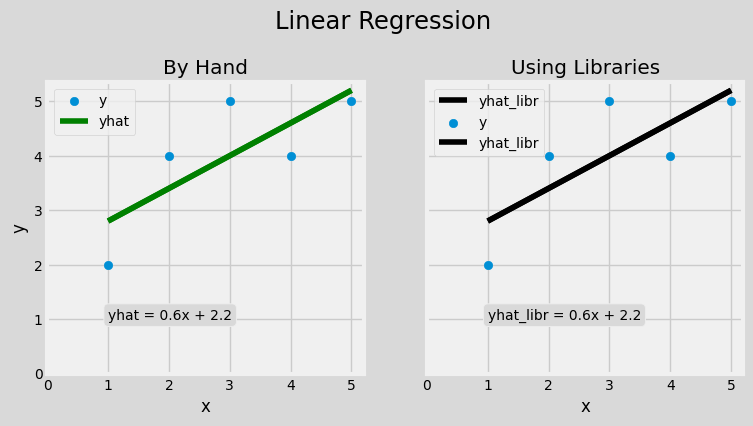

In [16]:
# Plot the results
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
fig = plt.figure(figsize=(8, 4), facecolor='0.85')
plt.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for ax in fig.get_axes():
  ax.scatter(x, y, label='y')

  ax1.plot(x, df_least['yhat'], color='green', label='yhat')
  ax1.set_title('By Hand')
  ax1.annotate(f'yhat = {round(m, 2)}x + {round(b, 2)}', xy=(1, 1), bbox=dict(boxstyle="round", facecolor='0.85'))

  ax2.plot(x, df_least['yhat_libr'], color='black', label='yhat_libr')
  ax2.set_title('Using Libraries')
  ax2.annotate(f'yhat_libr = {round(m_libr, 2)}x + {round(b_libr, 2)}', xy=(1, 1), bbox=dict(boxstyle="round", facecolor='0.85'))

  ax.set(xlabel='x', ylabel='y', xlim=(0), ylim=(0))
  ax.label_outer()
  ax.legend()

fig.suptitle('Linear Regression', fontsize=plt.rcParams['font.size']*1.75)

plt.show()